## BOW란?

-> BOW를 만드는 과정
(1) 각 단어에 고유한 정수 인덱스를 부여한다.  
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다.

문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

문서 1에 대해 BOW를 만든다. 근데 bow는 단어에 대한 표현이 아니고 문서에 대한 표현 같다. 역시 이번에도 문장을 가져왔다.

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.3 MB/s 
     |████████████████████████████████| 465 kB 56.8 MB/s 


In [ ]:
from konlpy.tag import Okt

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."

In [ ]:
okt = Okt()
doc1 = doc1.replace('.', '')
token = okt.morphs(doc1)

In [ ]:
word_to_index = {}
bow = []
bow2 = []

print(word_to_index.keys())

dict_keys([])


In [ ]:
for word in token: # 문장의 단어 하나씩 가져와서
  if word not in word_to_index.keys(): # 키에 없는 처음 보는 단어라면
    word_to_index[word] = len(word_to_index) # w2i에 문자를 정수에 맵핑함
    # BoW에 전부 기본값 1을 넣는다.
    bow.append(1)
    print(bow)
  else:
    # 재등장하는 단어라면 그 단어의 현재 bow의 빈도수를 가져와서 1을 더한다.
    index = word_to_index[word]
    bow[index] = bow[index] + 1

[1]
[1, 1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1]
[1, 2, 1, 1, 1, 1, 1, 1]
[1, 2, 1, 1, 2, 1, 1, 1, 1]
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


문서 1에 각 단어에 대해서 인덱스를 부여한 결과가 단어 사전이다. 단어 사전을 만드는 것이다.

bow결과를 보면 인덱스 4에 해당하는 물가상승률은 두 번 언급되었기 때문에 인덱스 4에 해당하는 값이 2이다.



In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
print('vocabulary :', word_to_index)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [ ]:
'''
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow
'''

#### countvector 클래스로 bow 만들기

사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원한다.

이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있다.

예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있다.

알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문이다. (하지만 길이로 정제하는 것은 역시 영어권에서만 의미가 있다.)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점이다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미한다.

아래를 보면 '물가상승률'이라는 단어를 인식하지 못한다.
'물가상승률과'와 '물가상승률은' 으로 조사를 포함해서 하나의 단어로 판단하기 때문에 서로 다른 두 단어로 인식한다. 따라서 각각 다른 인덱스에 1이라는 빈도의 값을 갖는다.

따라서 위의 BOW만드는 함수를 만들 줄 알아야한다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."]
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 1 1 1 1 1]]
vocabulary : {'정부가': 6, '발표하는': 4, '물가상승률과': 2, '소비자가': 5, '느끼는': 0, '물가상승률은': 3, '다르다': 1}


In [ ]:
token

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [token]
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

AttributeError: ignored

#### 불용어를 제거한 BoW

BoW를 사용한다는 것은 각 단어에 대한 빈도수를 수치화 하겠다는 것으로 결국 텍스트 내에서 어떤 단어들이 중요한지를 보고싶다는 의미를 함축하고 있다.

CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원한다.

In [ ]:
# 사용자 자체 불용어 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# nltk 불용어
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## 문서 단어 행렬(Document-Term Matrix = DTM)

서로 다른 문서들의 BoW들을 결합한 표현 방법이다. 이것으로 서로 다른 문서들을 비교할 수 있다.

#### 1. 표기법
문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말한다. 쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것이다.

ex) 
문서1 : 먹고 싶은 사과

문서2 : 먹고 싶은 바나나

문서3 : 길고 노란 바나나 바나나

문서4 : 저는 과일이 좋아요


각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기한다. 그러면 문서 1에 없는 단어라도 DTM의 문서 1행의 열에 있을 수 있다.(ex 노란) ★ 열은 동일하다.

문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 갖는다. 문서들을 벡터로 만들었으니 벡터 유사도 비교를 할 수 있다.

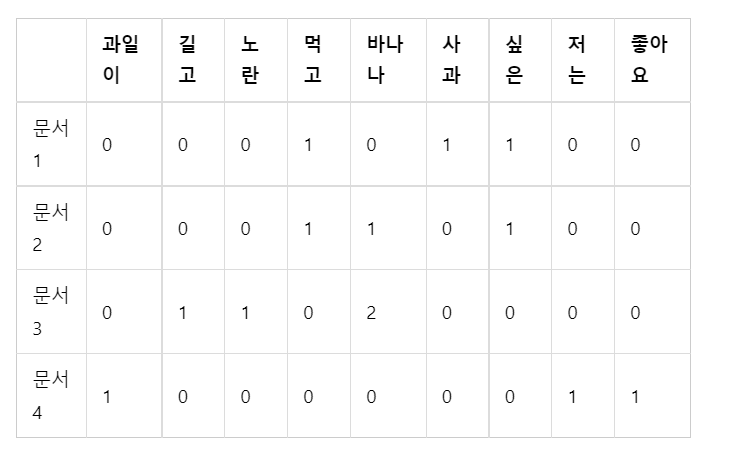

## TF-IDF(Term Frequency-Inverse Document Frequency)

DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치에 대해서 알아보겠다.(TF-IDF가 가중치인가 보다.)

TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 많은 정보를 고려하여 문서들을 비교할 수 있다.(가중치를 부여하기 때문이다.) 많은 경우에서 DTM보다 더 좋은 성능을 얻을 수 있다.



#### 1. TF-IDF

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다(열마다) 중요한 정도를 가중치로 주는 방법이다. 우선 DTM을 만든 후, TF-IDF 가중치를 부여한다.

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있다.




TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있다.

1) tf(d, t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수

TF는 어렵게 생각하지 마라 이미 DTM에서 구한 값들이다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문이다.

2) df(t) : 특정 단어 t가 등장한 문서의 수

여기서 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가진다. 

앞선 예제 바나나는 문서2와 문서3에서 등장했다. 이때 바나나의 df인 df(바나나)는 2이다.




3) idf(d, t) : df(t)에 반비례하는 수

-> 로그를 사용하는 이유
① 총 문서의 개수 n이 커질 수록 idf가 기하급수적으로 커지게 되므로 log를 사용한다.

② 불용어는 중요한 단어에 비해 최소 수십 배 자주 등장한다. 로그를 씌어주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있다. 로그를 씌우면 이런 격차를 줄이는 효과가 있다.

※ 분모에 1을 더하는 이유는 특정 단어가 전체 문서에서 등장하지 않을 경우 분모가 0이 되는 상황을 방지하기 위함



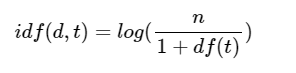

따라서 TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며(idf가 특정 단어 t가 등장한 횟수이므로 df가 크면 반비례로 작아지도록 함) 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단한다.

TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것이다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 된다.



#### tf-idf 구하기 예제


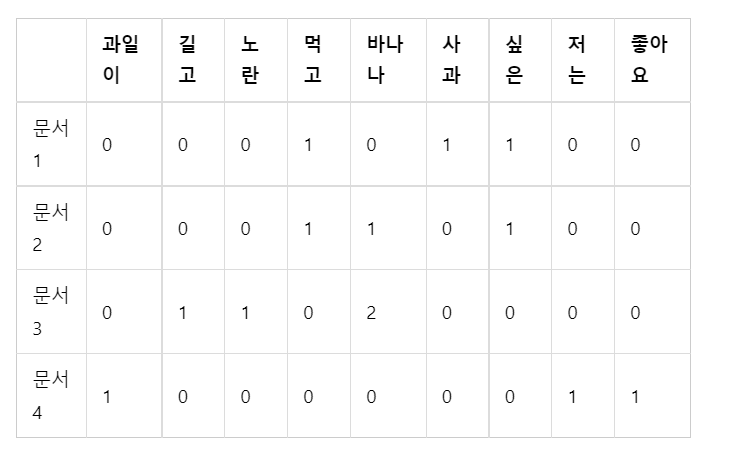

우선 tf는 앞서 사용한 DTM을 그대로 사용하면, 그것이 각 문서의 TF이다. tf는 문서마다 구하면 된다.

이제 TF와 곱할 IDF를 구한다. idf는 전체 문서의 고유 단어마다 구해주면 된다.

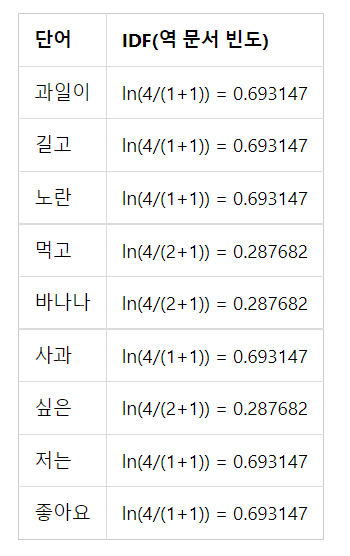

문서의 총 수는 4이기 때문에 ln 안에서 분자는 늘 4으로 동일하다. 분모의 경우에는 각 단어가 등장한 문서의 수(DF)를 의미하는데, 예를 들어서 '먹고'의 경우에는 총 2개의 문서(문서1, 문서2)에 등장했기 때문에 2라는 값을 가진다.

-> 결과

결과를 보면 문서 1개에만 등장한 단어와 문서2개에만 등장한 단어는 값의 차이를 보인다. IDF는 여러 문서에서 등장한 단어의 가중치를 낮춘다.

-> 최종 결과

tf와 idf를 곱한다. 바나나를 보면 문서 3에서의 바나나가 중요도가 높다. 다양한 문서에서 많이 등장하면 안 좋은 것이지만 특정 문서에서 자주 등장하면 좋은 것이기 때문이다.

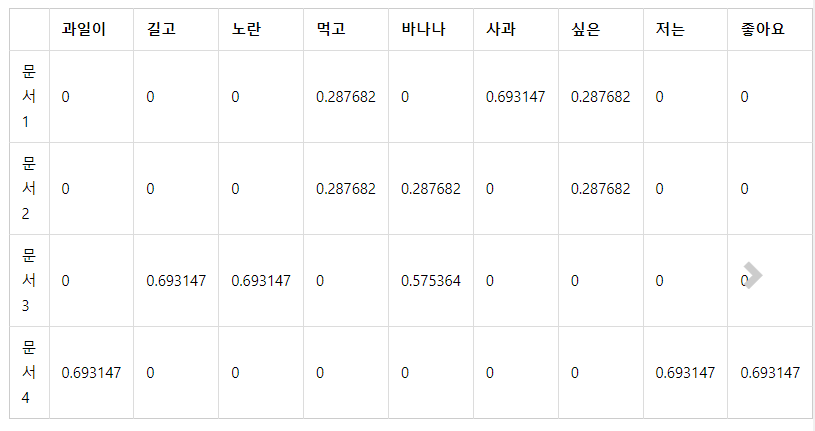

#### 파이썬으로 tf-idf 구현

1) 열을 만든다.

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

TF, IDF, 그리고 TF-IDF 값을 구하는 함수

In [ ]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [ ]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력해보겠습니다.

In [ ]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


TF-IDF 행렬을 출력

In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


#### 사이킷런의 TF-IDF 실습


DTM에서 각 단어의 인덱스가 어떻게 부여되었는지를 확인하기 위해, 인덱스를 확인해보면 vector.vocab이 dtm의 열과 같다.


첫번째 열의 경우에는 0의 인덱스를 가진 do이다. do는 세번째 문서에만 등장했기 때문에, 세번째 행에서만 1의 값을 가집니다. 두번째 열의 경우에는 1의 인덱스를 가진 know입니다. know는 첫번째 문서에만 등장했으므로 첫번째 행에서만 1의 값을 가집니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


사이킷런의 tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
